In [1]:
import os
nb_dir = os.getcwd()
listings_dir = os.path.join(nb_dir, 'listings')
os.chdir('..')

In [2]:
from math import sqrt, pi, cos
N = 8
frequency = 1.7
samples = [1/sqrt(8)*cos(2 * pi * frequency * (t / N)) for t in range(N)]

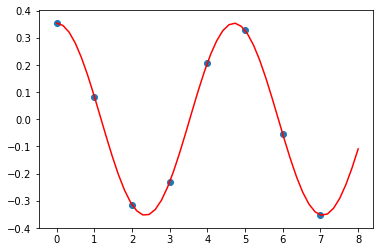

In [5]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_plot_wave'
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, N, 50)
wave = [1/sqrt(8)*cos(2 * pi * frequency * (t/N)) for t in x]
plt.plot(x, wave, label='signal', color='red')
plt.scatter(range(N), samples)
plt.show()

In [6]:
f = np.fft.fft(samples)
f

array([ 0.01813862+0.j        , -0.11373594+0.34545166j,
        0.93169317-0.9912542j ,  0.40521579-0.17396922j,
        0.36394247+0.j        ,  0.40521579+0.17396922j,
        0.93169317+0.9912542j , -0.11373594-0.34545166j])

/Users/lg/opt/anaconda3/envs/qiskit-3.7/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'use_line_collection'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<StemContainer object of 3 artists>

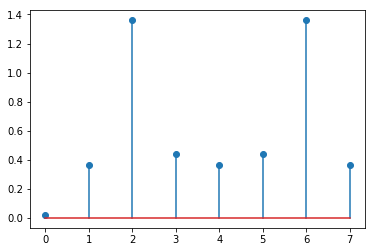

In [7]:
plt.stem(np.abs(f),use_line_collection=True)

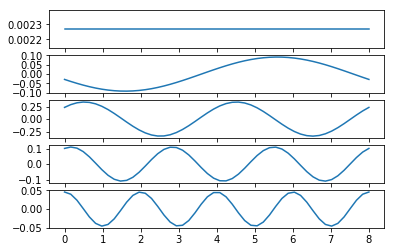

In [9]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_plot_components'
from math import atan2

a = abs(f)
d = [atan2(c.imag, c.real) for c in f]
fig, axs = plt.subplots(int(N/2)+1)
for k in range(int(N/2)+1):
    axs[k].plot(x, [(1/N if k == 0 or k == N/2 else 2/N) * a[k] * cos(2 * pi / N * k*j + d[k]) for j in x])
plt.show()

In [11]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_real_valued_sinusoids'
from math import pi
from sim_circuit import QuantumRegister, QuantumCircuit

def real_valued_sinusoids(n, v):
    theta = v*2*pi/N

    q = QuantumRegister(n)
    a = QuantumRegister(1)
    qc = QuantumCircuit(q, a) # ancilla is last qubit

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.cry(2**(j+1)*theta, q[j], a[0])

    return qc

In [13]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_encode_samples'
qc = real_valued_sinusoids(3, 1.7)
qc.report('sinusoids')[2]

[0.3535533905932737,
 0.08253539990953583,
 -0.31501837766752516,
 -0.2296145595013207,
 0.2078134688887266,
 0.3266407412190941,
 -0.05530793552061844,
 -0.35246350348255356,
 0.0,
 0.3437846822675102,
 0.16050988048005152,
 -0.26884410736524317,
 -0.2860307014088421,
 0.13529902503654911,
 0.3492005616668551,
 0.0277394793174619]

In [15]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_cis'
def cis(theta):
    return cos(theta) + 1j*sin(theta)

In [17]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_state_from_samples'
from math import sin

theta = pi/3
state = [sqrt(1/N) * cis(k*theta) for k in range(N)]

In [19]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_geom'
def geom(n, theta):
    N = 2**n
    return [sqrt(1/N) * cis(k*theta) for k in range(N)]

In [20]:
state = geom(3, pi/3)
print([(round(amp.real, 5) + 1j*round(amp.imag, 5)) for amp in state])

[(0.35355+0j), (0.17678+0.30619j), (-0.17678+0.30619j), (-0.35355+0j), (-0.17678-0.30619j), (0.17678-0.30619j), (0.35355+0j), (0.17678+0.30619j)]


In [21]:
[print("phase of amplitude ", i, ":", round(atan2(state[i].imag, state[i].real), 5)) for i in range(len(state))]

phase of amplitude  0 : 0.0
phase of amplitude  1 : 1.0472
phase of amplitude  2 : 2.0944
phase of amplitude  3 : 3.14159
phase of amplitude  4 : -2.0944
phase of amplitude  5 : -1.0472
phase of amplitude  6 : -0.0
phase of amplitude  7 : 1.0472


[None, None, None, None, None, None, None, None]

In [22]:
state = geom(3, pi/6)
print([(round(amp.real, 5) + 1j*round(amp.imag, 4)) for amp in state])

[(0.35355+0j), (0.30619+0.1768j), (0.17678+0.3062j), 0.3536j, (-0.17678+0.3062j), (-0.30619+0.1768j), (-0.35355+0j), (-0.30619-0.1768j)]


In [24]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_geometric_sequence_circuit'
def geometric_sequence_circuit(n, v):
    theta = v*2*pi/N

    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.p(2 ** j * theta, q[j])

    assert all_close(qc.run(), [sqrt(1/N) * cis(k*theta) for k in range(N)])

In [25]:
N = 8
omega = cis(2*pi/N)
abs(omega**N)

1.0

In [26]:
omega = cis(2*pi/N)
[omega**k for k in range(N)]

[(1+0j),
 (0.7071067811865476+0.7071067811865475j),
 (2.220446049250313e-16+1j),
 (-0.7071067811865474+0.7071067811865477j),
 (-1+4.440892098500626e-16j),
 (-0.7071067811865479-0.7071067811865471j),
 (-6.661338147750939e-16-1j),
 (0.707106781186547-0.707106781186548j)]

In [27]:
N = 8
[cis(l*2*pi/N) for l in range(N)]

[(1+0j),
 (0.7071067811865476+0.7071067811865475j),
 (6.123233995736766e-17+1j),
 (-0.7071067811865475+0.7071067811865476j),
 (-1+1.2246467991473532e-16j),
 (-0.7071067811865477-0.7071067811865475j),
 (-1.8369701987210297e-16-1j),
 (0.7071067811865475-0.7071067811865477j)]

In [28]:
state = geom(1, pi/3)

In [29]:
assert(round(atan2(state[1].imag, state[1].real), 5) == round(pi/3, 5))

In [31]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_apply_h'
q = QuantumRegister(1)
qc = QuantumCircuit(q)

theta = pi/3
qc.h(q[0])
qc.p(theta, q[0])
qc.h(q[0])

state = qc.run()

In [32]:
from math import isclose
theta = pi/3
print([(round(amp.real, 5) + 1j*round(amp.imag, 5)) for amp in state])
[(0.75000+0.43301j), (0.25000-0.43301j)]
assert(isclose(abs(state[0]), cos(theta/2)))
assert(isclose(abs(state[1]), sin(theta/2)))

[(0.75+0.43301j), (0.25-0.43301j)]


In [33]:
quantities = [4, 2, 2, 3]
prices = [1.2, 1.5, 2, 0.7]

In [34]:
sum([quantities[k] * prices[k] for k in range(len(quantities))])

13.9

In [36]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_inner'
def inner(v1, v2):
    assert(len(v1) == len(v2))
    return sum(z1*z2.conjugate() for z1, z2 in zip(v1, v2))

In [37]:
N = 4
omega = cis(2*pi/N)
F_0 = [omega**(0*k) for k in range(N)]
F_1 = [omega**(1*k) for k in range(N)]
F_2 = [omega**(2*k) for k in range(N)]
F_3 = [omega**(3*k) for k in range(N)]

In [38]:
F_0

[(1+0j), (1+0j), (1+0j), (1+0j)]

In [39]:
N = 4
F_0 = [cis(k*0*2*pi/N) for k in range(N)]
F_1 = [cis(k*1*2*pi/N) for k in range(N)]
F_2 = [cis(k*2*2*pi/N) for k in range(N)]
F_3 = [cis(k*3*2*pi/N) for k in range(N)]

In [40]:
N = 8
frequency = 1.7
samples = [1/sqrt(N)*cos(2 * pi * frequency * (i / N)) for i in range(N)]

In [41]:
F_0 = [cis(k*0*2*pi/N) for k in range(N)]
similarity = inner(samples, F_0)
round(similarity.real, 5) + 1j*round(similarity.imag, 5)

(0.01814+0j)

In [42]:
dft = [inner(samples, [cis(k*l*2*pi/N) for k in range(N)]) for l in range(8)]
print([(round(x.real, 5) + 1j*round(x.imag, 5)) for x in dft])

[(0.01814+0j), (-0.11374+0.34545j), (0.93169-0.99125j), (0.40522-0.17397j), (0.36394+0j), (0.40522+0.17397j), (0.93169+0.99125j), (-0.11374-0.34545j)]


In [43]:
f = np.fft.fft(samples)
f

array([ 0.01813862+0.j        , -0.11373594+0.34545166j,
        0.93169317-0.9912542j ,  0.40521579-0.17396922j,
        0.36394247+0.j        ,  0.40521579+0.17396922j,
        0.93169317+0.9912542j , -0.11373594-0.34545166j])

In [45]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_fourier_basis'
def fourier_basis(N, l):
    return [1/sqrt(N) * cis(k*l*2*pi/N) for k in range(N)]

In [47]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_icft'
def icft(state):
    N = len(state)
    s = [state[k] for k in range(N)]

    for i in range(N):
        state[i] = inner(s, fourier_basis(N, i))

In [49]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_bin_digit'
from math import log2

def bin_digit(k, j):
    return 1 if k & (1 << j) else 0

def cfft(state):
    n = int(log2(len(state)))
    for j in range(n)[::-1]:
        for k in range(len(state)):
            if bin_digit(k, j) == 0:
                state[k] = 1/sqrt(2)*(state[k] + state[k+2**j])
                state[k+2**j] = state[k] - sqrt(2)*state[k+2**j]

            else:
                state[k] *= cis(-pi * (k%2**j)*2**-j)

In [51]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_cft'
def cft(state):
    N = len(state)
    s = [state[k] for k in range(N)]

    for i in range(N):
        state[i] = inner(s, fourier_basis(N, -i))

In [53]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_qft_iqft'
def qft(self, targets, swap=True):
    for j in range(len(targets))[::-1]:
        self.h(targets[j])
        for k in range(j)[::-1]:
            self.cp(pi * 2.0 ** (k - j), targets[j], targets[k])

    if swap:
        self.mswap(targets)

def iqft(self, targets, swap=True):
    for j in range(len(targets))[::-1]:
        self.h(targets[j])
        for k in range(j)[::-1]:
            self.cp(-pi * 2 ** (k - j), targets[j], targets[k])

    if swap:
        self.mswap(targets)

In [55]:
# %load '/Users/lg/DevQuantum/cqc_code/src/ch05/listings/ch05_classical_inverse_fourier'
def classical_inverse_fourier(state, step, targets):
    n = len(targets)
    sq2 = sqrt(2)
    sq2i = 1/sqrt(2)
    for j in range(n)[::-1]:
        dist = 2**j
        rot = cis(-pi/dist)
        rots = [1 for _ in range(dist)]
        r = 1
        for m in range(dist):
            rots[m] = r
            r = r*rot

        for l in range(2**(n-j-1)):
            i = 0
            for k in range(2*l*dist, (2*l+1)*dist):
                state[k] = sq2i*(state[k] + state[k+dist])
                state[k+dist] = (state[k] - sq2*state[k+dist])*rots[i]
                i += 1

In [56]:
divmod(13, 2)

(6, 1)

In [57]:
divmod(6, 2)

(3, 0)

In [58]:
divmod(3, 2)

(1, 1)

In [59]:
divmod(1, 2)

(0, 1)